# Práctica de Clustering

## Normativa de la práctica



* **Formato de entrega**: Se espera que cada estudiante entregue este mismo notebook, renombrado como `<Apellido1>_<Apellido2>_<Nombre>_clustering.ipynb`, antes de la fecha de entrega establecida. Ejemplo: `Oliva_Moya_Christian_clustering.ipynb`

* **Dudas**: Cualquier duda o consulta sobre la práctica, escribid a `christian.oliva@uam.es`

---

Versión 1.0 a día 16 de febrero de 2024

## Enunciado

En esta práctica se os pide realizar el proceso de análisis de un conjunto de datos no etiquetado basándonos en los datos del conocido dataset *California Housing*. A partir de los datos originales que nos proporciona la librería *Sklearn*, debéis hacer una propuesta de análisis de los datos de los que disponéis utilizando herramientas de Clustering para luego hacer una propuesta del precio de la vivienda. Se os piden los siguientes apartados:

* **1) Descarga de datos y preprocesamiento [1.0 punto]**: En esta sección debéis descargar los datos y realizar el preprocesamiento que consideréis oportuno. En esta fase, el dataset debe quedar preparado para su uso directo con los algoritmos de clustering que queráis implementar.

* **2) Desarrollo de las pruebas [3.5 puntos]**: En esta sección debéis realizar las pruebas que consideréis necesarias para clusterizar vuestros datos. Tenéis libertad de proponer uno o varios métodos de clusterización, según hayáis considerado.

* **3) Análisis de los resultados obtenidos [4.5 puntos]**: En esta sección debéis realizar un análisis de comprensión de los resultados obtenidos, es decir, debéis justificar qué características tienen los clusters que habéis obtenido. En este apartado es especialmente importante la justificación de los resultados obtenidos. Sería interesante encontrar características únicas en los clusters para poder tomar decisiones.

* **4) Aproximación del precio de la vivienda [1.0 punto]**: En esta última sección se os pide aproximar el valor de la vivienda según el cluster al que pertenezca. Esta última sección se evaluará calculando el **Error Cuadrático Medio (MSE)** de vuestra predicción frente al valor real del dataset.

---

Consideraciones:

  * Todas las decisiones son válidas si están correctamente justificadas.

  * El precio de la vivienda no debe utilizarse hasta el apartado 4. <font color="red">La práctica se calificará con un 0.0 si se incluye en el clustering el precio de la vivienda.</font>

  * No se permite el uso de ninguna técnica de predicción mediante algoritmos de aprendizaje supervisado. <font color="red">La práctica se calificará con un 0.0 si se incluye algún algoritmo de Inteligencia Artificial que no sea Clustering.</font>

  * Se recomienda no utilizar los atributos de latitud y longitud. En caso de considerarlo necesario, tened en cuenta que grupar por latitud y longitud va a provocar que las viviendas se agrupen por ciudades (Los Ángeles, San Diego, San Francisco, etc.).

  * <font color="#008800">Recuerda justificar todas las decisiones y explicar todos los resultados obtenidos.</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error

# Añade aquí todos los imports que consideres necesarios


## 1) Descarga de datos y preprocesamiento

In [2]:
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Utilizamos info() and describe() para obtener informaciones del dato.

El código **describe()** proporciona estadísticas resumidas de las columnas numéricas del DataFrame.

Obtenemos un resumen de un DataFrame con información sobre la estructura, los tipos de datos y los valores que faltan en el DataFrame con **info()**. Además, nos muestra índice, nombres de columnas, uso de memoria, recuento de no nulos de DataFrame.

In [4]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [5]:
# Summary statistics for the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


Para identificar estos valores perdidos, podemos utilizar el método **isnull()**, seguido del método sum() para contar el número de valores perdidos en cada columna.

In [6]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())
print("Total missing values:", data.isnull().sum().sum())

Missing values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
Total missing values: 0


Eliminamos las columnas Medinc, Longitude y Latitude ya que no necesitamos la mediana de ingresos, la longitud y la latitud.

In [7]:
# Eliminate MedInc,Longitude and Latitude column
data = data.drop(columns=['MedInc', 'Longitude', 'Latitude'])

Podemos utilizar boxplot para detectar valores atípicos.


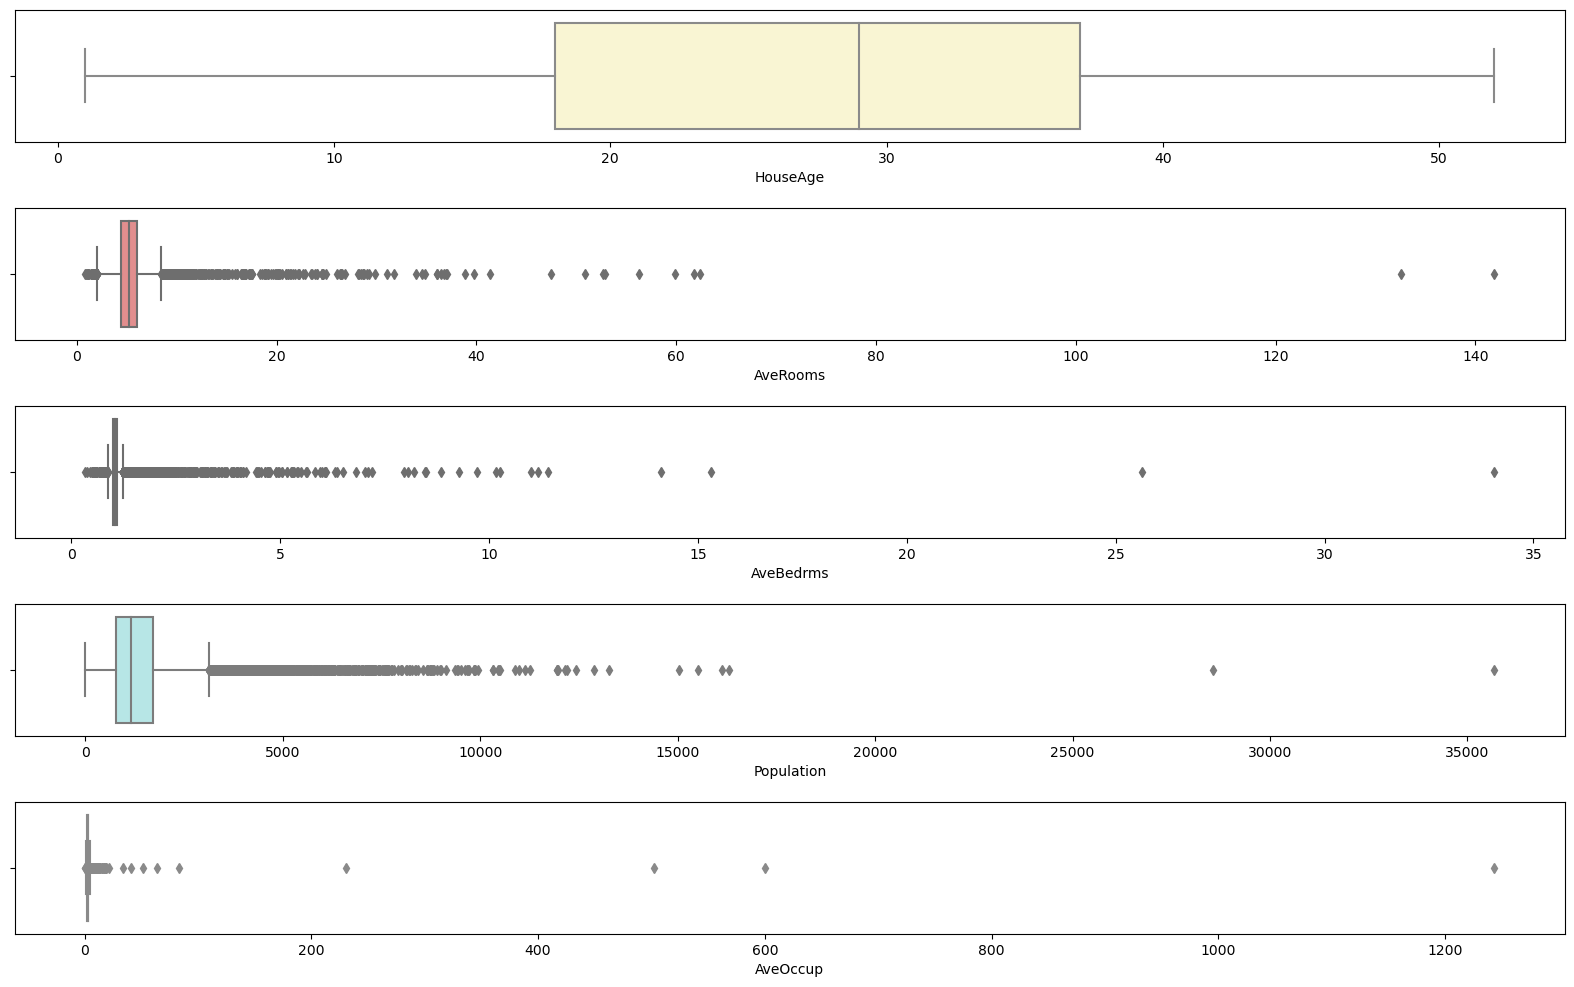

In [8]:
# Check if the data has outliers using boxplot with colors paleturquoise, lemonchiffon, lightcoral, violet
fig, axes = plt.subplots(5, 1, figsize=(20, 12))
# sns.boxplot(x=data["MedInc"], ax=axes[0], color="paleturquoise")
sns.boxplot(x=data["HouseAge"], ax=axes[0], color="lemonchiffon")
sns.boxplot(x=data["AveRooms"], ax=axes[1], color="lightcoral")
sns.boxplot(x=data["AveBedrms"], ax=axes[2], color="violet")
sns.boxplot(x=data["Population"], ax=axes[3], color="paleturquoise")
sns.boxplot(x=data["AveOccup"], ax=axes[4], color="lemonchiffon")
# sns.boxplot(x=data["Latitude"], ax=axes[6], color="lightcoral")
# sns.boxplot(x=data["Longitude"], ax=axes[7], color="violet")
fig.subplots_adjust(hspace=0.5)
plt.show()

Eliminamos valores atípicos y guardamos los índices para utilizarlos en la columna "price".

In [9]:
cols = ["AveRooms", "AveBedrms", "Population", "AveOccup"]
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

# Save dropped rows from the original data
outliers_index = ((data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print(outliers_index)

# Drop the rows that have outliers in any of the columns in cols
data = data[~outliers_index]
data.describe().T

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636     True
20637    False
20638    False
20639    False
Length: 20640, dtype: bool


,count,mean,std,min,25%,50%,75%,max
HouseAge,17348.0,29.636500,12.291181,1.000000,19.000000,30.000000,38.000000,52.000000
AveRooms,17348.0,5.235522,1.112580,2.032738,4.457064,5.191320,5.950000,8.467890
AveBedrms,17348.0,1.047011,0.066648,0.866013,1.002426,1.043338,1.088415,1.239521
Population,17348.0,1260.206076,625.637588,5.000000,805.000000,1150.000000,1619.000000,3132.000000
AveOccup,17348.0,2.843517,0.625254,1.161290,2.420809,2.795691,3.220064,4.560748


Revisamos cómo se distribuyen los datos con un diagrama de violín después de eliminar los valores atípicos.

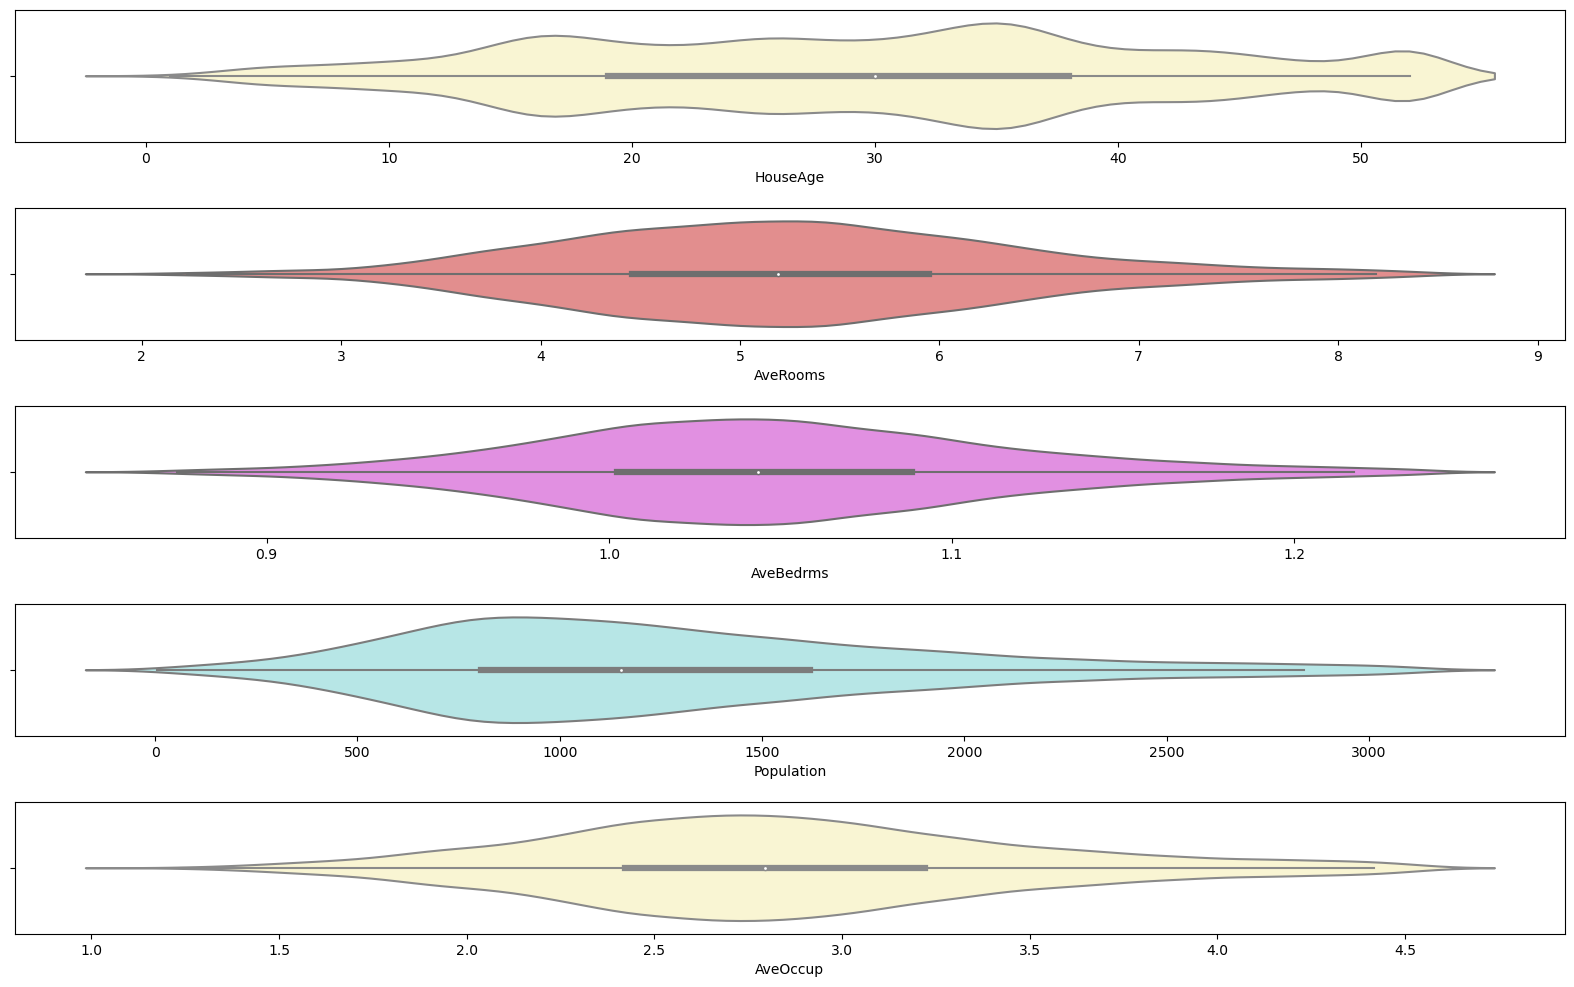

In [10]:
# Check if the data has outliers using violin with colors paleturquoise, lemonchiffon, lightcoral, violet
fig, axes = plt.subplots(5, 1, figsize=(20, 12))
# sns.violinplot(x=data["MedInc"], ax=axes[0], color="paleturquoise")
sns.violinplot(x=data["HouseAge"], ax=axes[0], color="lemonchiffon")
sns.violinplot(x=data["AveRooms"], ax=axes[1], color="lightcoral")
sns.violinplot(x=data["AveBedrms"], ax=axes[2], color="violet")
sns.violinplot(x=data["Population"], ax=axes[3], color="paleturquoise")
sns.violinplot(x=data["AveOccup"], ax=axes[4], color="lemonchiffon")
# sns.violinplot(x=data["Latitude"], ax=axes[6], color="lightcoral")
# sns.violinplot(x=data["Longitude"], ax=axes[7], color="violet")
fig.subplots_adjust(hspace=0.5)
plt.show()

Podemos observar correlaciones entre las características para comprender las relaciones entre ellas.

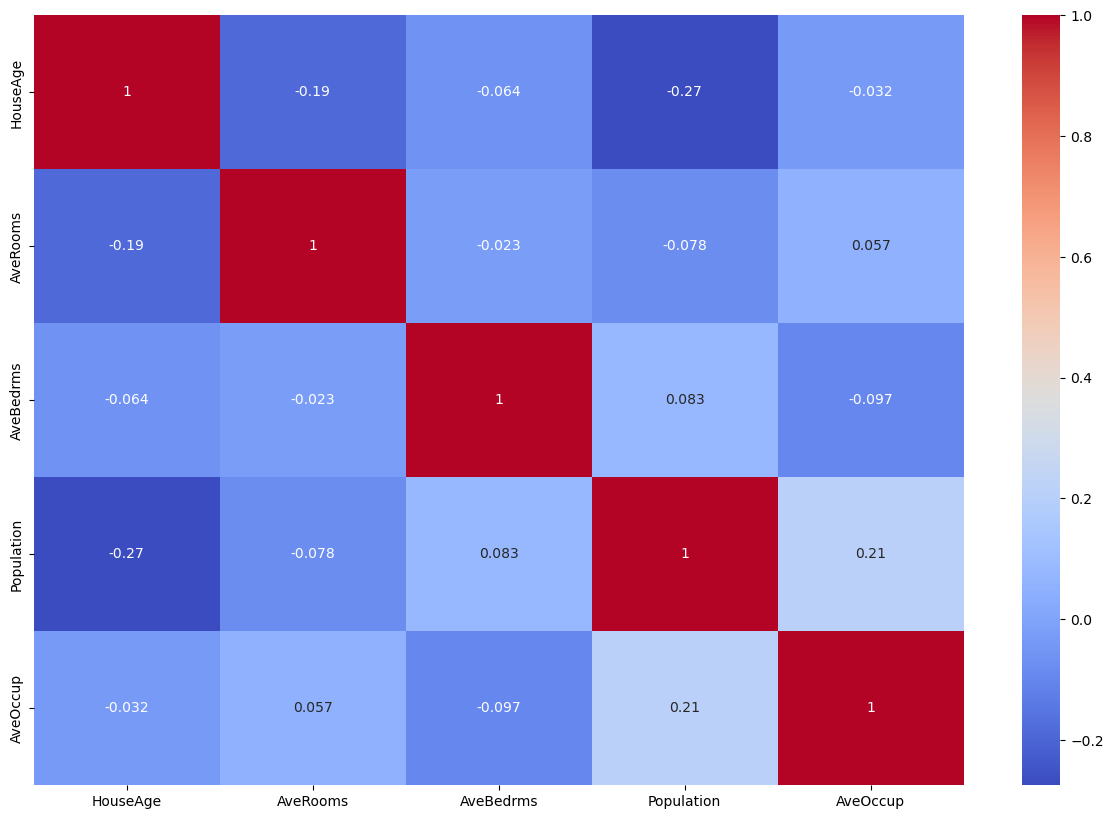

In [11]:
# Correlation matrix with heatmap
corr = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

Los algoritmos de clustering se basan en medidas de distancia. Para asegurar que todas las características numéricas contribuyan por igual al proceso de clustering, es necesario estandarizarlas o normalizarlas.

In [12]:
# Normalize the data and change the scaled_data to a DataFrame with columns HouseAge, AveRooms, AveBedrms, Population, AveOccup
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data

,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,0.924551,1.571712,-0.348125,-1.499643,-0.460564
1,-0.702678,0.901188,-1.127298,1.823463,-1.173437
2,1.819528,2.743804,0.396655,-1.221519,-0.065986
3,1.819528,0.522970,0.390848,-1.122417,-0.472736
4,1.819528,0.940482,0.511211,-1.111228,-1.058879
...,...,...,...,...,...
17343,-0.133148,1.387399,1.519140,-0.350382,0.292123
17344,-0.377233,-0.170840,1.295234,-0.663672,-0.452486
17345,-1.028124,-0.026947,1.096559,-0.404729,-0.828298
17346,-0.946763,0.084482,1.874207,-0.829907,-1.152057


Determinamos cuántos componentes necesitas al menos para predecir con un PCA,

In [13]:
# Apply PCA to the data
pca = PCA(n_components=scaled_data.shape[1])
pca_data = pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.27735918 0.22097945 0.21869887 0.16724829 0.11571421]


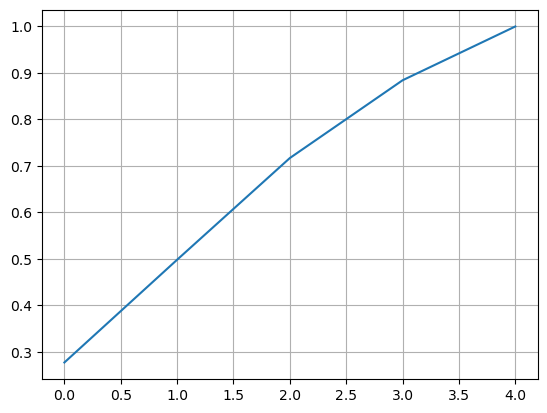

In [14]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.grid()
plt.show()

La gráfica muestra que los primeros 3 componentes explican el 90% de la varianza, entonces podemos elegir 3 como el número de componentes para usar en el modelo de predicción.

In [15]:
# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])
pca_data

,PC1,PC2,PC3
0,-1.401912,-0.887094,-1.602702
1,1.175527,-0.153154,-0.574566
2,-1.264945,-0.983933,-2.004601
3,-1.850491,-0.050905,-0.407537
4,-1.971335,0.215958,-0.949471
...,...,...,...
17343,0.468112,0.526344,-1.266903
17344,-0.247941,1.229412,-0.527795
17345,0.170636,1.360357,-0.886221
17346,-0.157266,2.009890,-1.290307


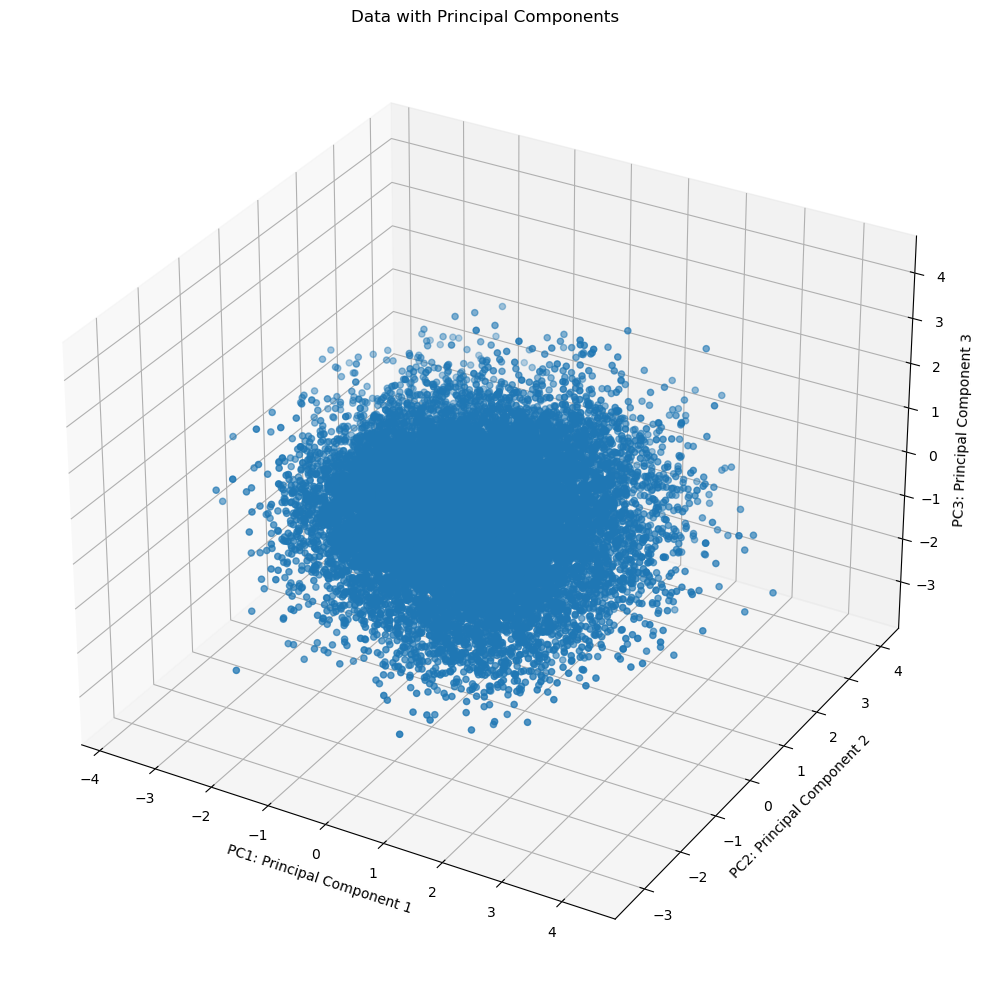

In [16]:
# Plot the data with principal components
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data["PC1"], pca_data["PC2"], pca_data["PC3"])
ax.set_xlabel("PC1: Principal Component 1")
ax.set_ylabel("PC2: Principal Component 2")
ax.set_zlabel("PC3: Principal Component 3")
ax.title.set_text("Data with Principal Components")
plt.tight_layout()
plt.show()

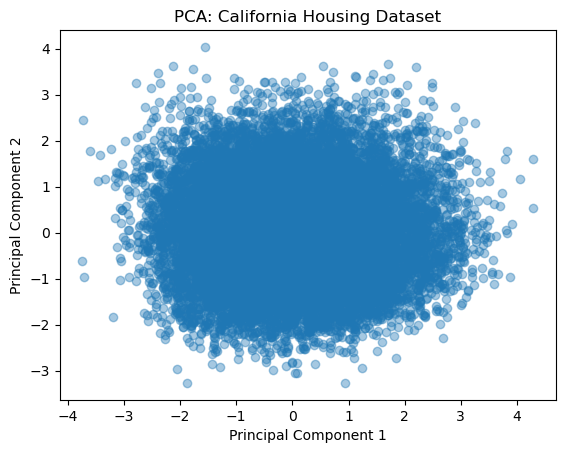

In [17]:
plt.scatter(pca_data["PC1"], pca_data["PC2"], alpha=0.4)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: California Housing Dataset")
plt.show()

---

## 2) Desarrollo de las pruebas

### Aplicamos el método de clustering aglomerativo

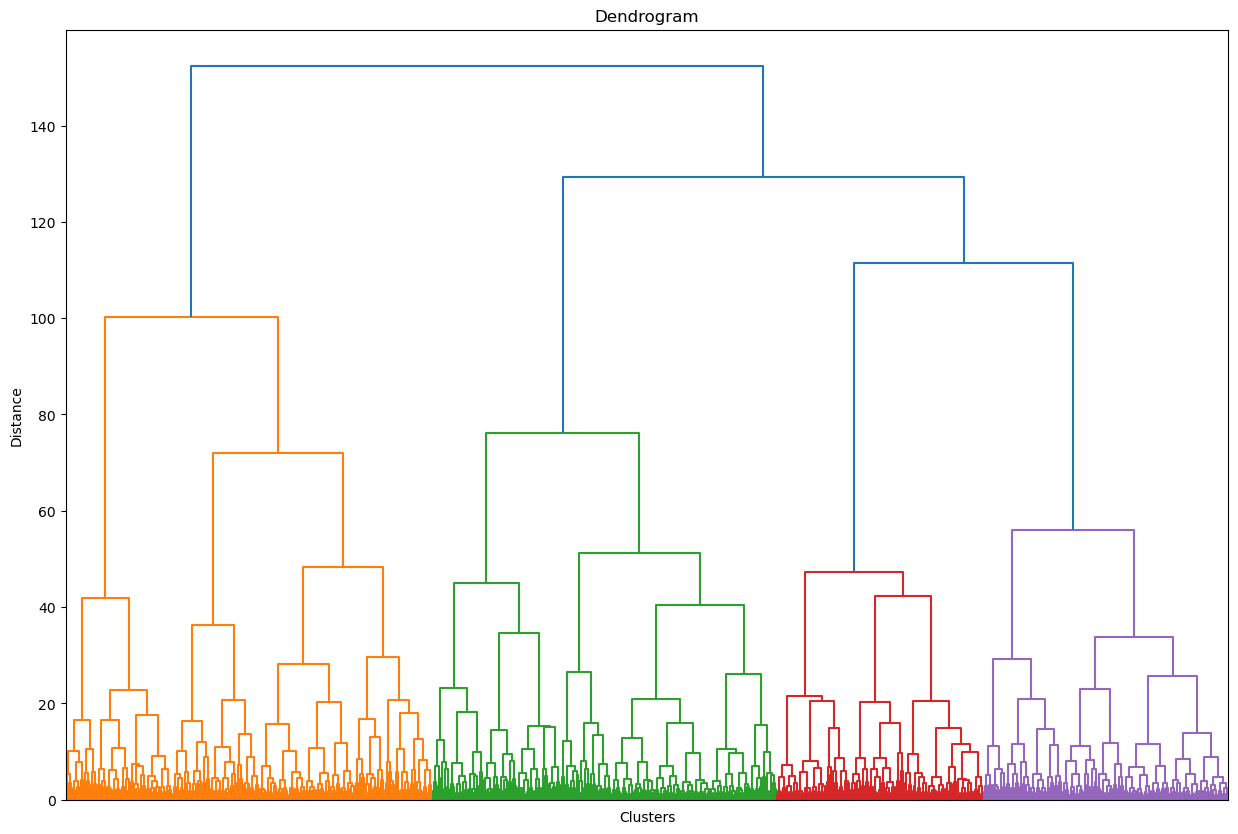

In [18]:
# Create a dendogram to find the optimal number of clusters
Z = linkage(pca_data, method='ward', metric='euclidean')

plt.figure(figsize=(15, 10))
dendrogram(Z, p=20, truncate_mode='level', show_leaf_counts=True, no_labels=True)
plt.title("Dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Distance")
plt.show()

Un dendograma es una herramienta valiosa para visualizar los resultados de la agrupación jerárquica. Permite comprender las relaciones entre los datos y tomar decisiones informadas sobre el número y la estructura de los clusters. Al observar este gráfico de dendrograma, podemos elegir 4 clusters, por lo que establecemos la altura como 110 en el corte.

In [19]:
# To separate the data into 4 clusters realize corte to the dendogram
max_d = 110
clusters_agglo = fcluster(Z, max_d, criterion='distance')
clusters_agglo

array([4, 2, 4, ..., 2, 2, 2], dtype=int32)

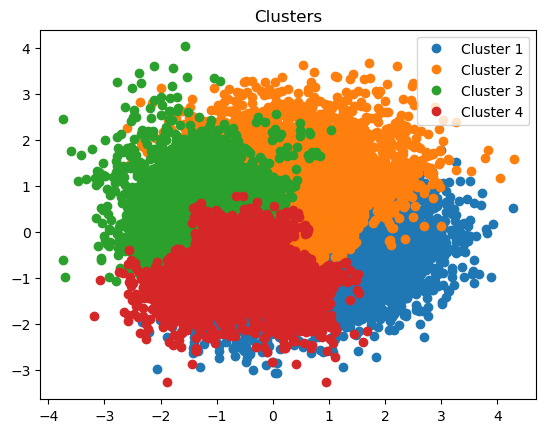

In [20]:
index = fcluster(Z, 110, criterion='distance')
for i in np.unique(index):
    plt.plot(pca_data.iloc[index == i, 0], pca_data.iloc[index == i, 1], 'o', label="Cluster {}".format(i))
plt.legend()
plt.title("Clusters")
plt.show()


In [21]:
# Apply clustering aggloremative with 4 clusters
agglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agglo_data = agglo.fit_predict(pca_data)
agglo_labels = agglo.labels_
agglo_labels


array([1, 2, 1, ..., 2, 2, 2])

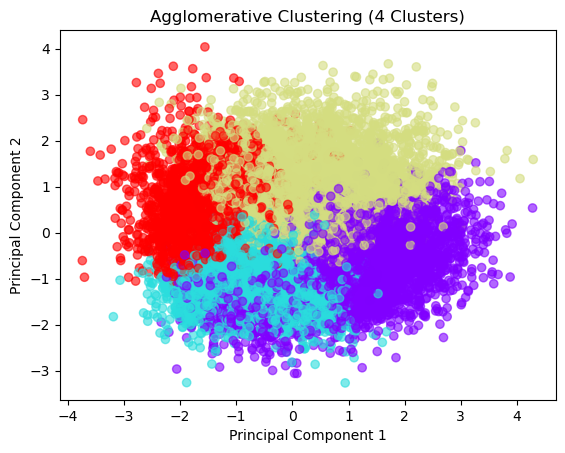

In [22]:
# Plot the data with the clusters with labels
plt.scatter(pca_data["PC1"], pca_data["PC2"], c=agglo_labels, cmap='rainbow', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering (4 Clusters)")
plt.show()

In [23]:
silhouette_score_agglo = silhouette_score(pca_data, agglo_labels, metric='euclidean')

print(f"Silhouette score for Agglomerative: {silhouette_score_agglo:.4f}")

Silhouette score for Agglomerative: 0.1610


#### 3) Análisis de los resultados obtenidos

Cada cluster ilustra el concepto de clustering aglomerativo. En este tipo de clustering, los puntos de datos se fusionan de manera gradual en clusters basados en su proximidad, lo que da como resultado una estructura jerárquica.

Por eso aquí, agrupamos los datos en función de la distancia. A medida que la distancia entre los puntos de datos es menor, mayor es la probabilidad de que se agrupen en el mismo cluster durante el proceso iterativo.

Gracias al dendrograma, podemos comprender los subconjuntos naturales del conjunto de datos y sus relaciones entre sí.

En el dendrograma, los valores de distancia en el eje horizontal indican el grado de similitud de los conglomerados. Los valores de distancia pequeños indican una gran similitud. Esta información ayuda a determinar el número adecuado de conglomerados.

El gráfico de dispersión muestra el resultado del algoritmo de clustering aglomerativo aplicado a un conjunto de datos. Se observa la formación de 4 clusters diferenciados, cada uno representado por un color diferente. Los puntos dentro de cada cluster comparten características similares, lo que se refleja en su proximidad espacial en el gráfico.

Calculamos el valor Silhouette para evaluar la calidad de la clusterización Aglomerativo. El valor Silhouette varía entre -1 y 1, donde un valor cercano a 1 indica una buena clusterización, un valor cercano a 0 indica una clusterización ambigua y un valor cercano a -1 indica una mala clusterización. En este caso el valor es 0.16 y indica una ambigua clusterización.

### Aplicamos el método de clustering kmeans

In [24]:
# Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, init = 'random', n_init = 10).fit(pca_data)

clusters_kmean = kmeans.predict(pca_data)
clusters_kmean

array([0, 2, 0, ..., 3, 3, 3], dtype=int32)

In [25]:
# Identify center point for each cluster
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=["PC1", "PC2", "PC3"])
centroids

,PC1,PC2,PC3
0,-1.041884,-0.573673,-0.043276
1,0.828725,-0.213635,1.340115
2,1.017978,-0.353301,-0.909101
3,-0.364036,1.281041,-0.097142


In [26]:
kmeans_labels = kmeans.labels_
kmeans_labels

array([0, 2, 0, ..., 3, 3, 3], dtype=int32)

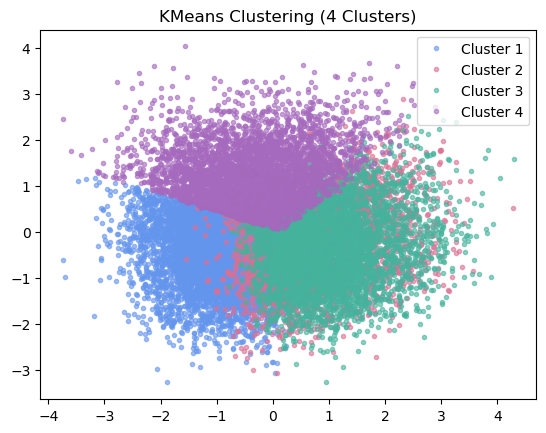

In [27]:
colors =  ['cornflowerblue', 'palevioletred', '#45B39D', '#A569BD']

for i in np.unique(clusters_kmean):
    plt.plot(pca_data.iloc[clusters_kmean == i, 0], pca_data.iloc[clusters_kmean == i, 1], '.', label="Cluster {}".format(i+1), color=colors[i], alpha=0.6)
    # Mark the centroid of each cluster
    plt.scatter([centroids["PC1"]], [centroids["PC2"]], c=colors[i], alpha=0.5, edgecolors='black')
    plt.scatter([kmeans.cluster_centers_[i, 0]], [kmeans.cluster_centers_[i, 1]], color="black", marker='o')
plt.legend()
plt.title("KMeans Clustering (4 Clusters)")
plt.show()

#### 3) Análisis de los resultados obtenidos

Clustering de K-Means es un popular algoritmo de aprendizaje automático no supervisado que se utiliza para dividir puntos de datos en un número predefinido de clústeres (k). Su objetivo es agrupar puntos de datos similares en función de sus características, creando clusters con alta similitud dentro del cluster y baja similitud entre clusters.

Aquí hemos dividido el conjunto de datos en k=4 clusters. Dado que el algoritmo K-Means asigna cada punto de datos a un cluster basándose en el centro más cercano, muestra a qué cluster pertenece cada punto de datos. Hemos calculado el centro de cada cluster llamado centroid, y estos centroides representan la media de los puntos de datos del cluster.

El gráfico de dispersión muestra el resultado del algoritmo de clustering K-Means aplicado a un conjunto de datos. Se observa la formación de 4 clusters diferenciados, cada uno representado por un color diferente. Los puntos dentro de cada cluster comparten características similares, lo que se refleja en su proximidad espacial en el gráfico.


In [28]:
# Calculate the silhouette score
silhouette_score_kmeans = silhouette_score(pca_data, kmeans_labels, metric='euclidean')
print(f"Silhouette score for KMeans: {silhouette_score_kmeans}")

Silhouette score for KMeans: 0.25709265090205846


Calculamos el valor Silhouette para evaluar la calidad de la clusterización KMeans. El valor Silhouette varía entre -1 y 1, donde un valor cercano a 1 indica una buena clusterización, un valor cercano a 0 indica una clusterización ambigua y un valor cercano a -1 indica una mala clusterización. En este caso el valor es 0.25 y indica una ambigua clusterización.

### Aplicamos el método de clustering DBSCAN

clusters_dsbscan:
[0 0 0 ... 0 0 0]

dbscan_labels:
[0 0 0 ... 0 0 0]



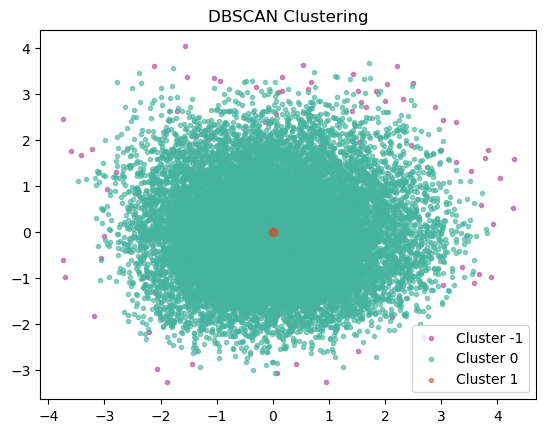

In [29]:
# Apply DBSCAN
# Define epsilon (radius of influence for a point) and minimum samples
eps = 0.5
min_samples = 5
# Create the DBSCAN object
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')

# Fit the data
clusters_dbscan = dbscan.fit_predict(pca_data)
print("clusters_dsbscan:")
print(clusters_dbscan)
print()

dbscan_labels = dbscan.labels_
print("dbscan_labels:")
print(dbscan_labels)
print()

# Plot the data with the clusters with labels
color = ["#b34592", "#45b39d", "#b36645"]
for c in range(-1, 2, 1):
    plt.scatter(pca_data.iloc[clusters_dbscan == c, 0], pca_data.iloc[clusters_dbscan == c, 1], label=f"Cluster {c}", color=color[c+1], alpha=0.6, marker='.')
    if c != -1:
        centroids = pca_data.iloc[clusters_dbscan == c].mean(axis=0)
        plt.plot(centroids[0], centroids[1], 'o', color='#b36645')
plt.legend()
plt.title("DBSCAN Clustering")
plt.show()


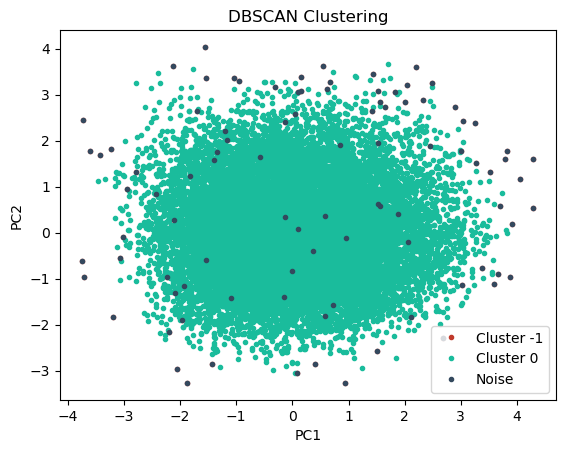

In [30]:
import matplotlib.colors as mcolors


colors = ["#1ABC9C", "#C0392B", "#34495E"]
cmap = mcolors.ListedColormap(colors)

# Assign a different color to each cluster and noise points
cluster_unique = np.unique(dbscan_labels)
noise_indices = np.where(dbscan_labels == -1)[0]

for i, label in enumerate(cluster_unique):
    if label == -1:
        color = '#C0392B'  # Keep gray for noise points
    else:
        color = cmap(label) # Color for clusters
    cluster_mask = (dbscan_labels == label)
    plt.plot(pca_data.iloc[cluster_mask, 0], pca_data.iloc[cluster_mask, 1], '.', markersize=6, label=f'Cluster {label}', color=color)

if len(noise_indices) > 0:
    plt.plot(pca_data.iloc[noise_indices, 0], pca_data.iloc[noise_indices, 1], '.', markersize=6, label='Noise', color='#34495E')

plt.legend()
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [31]:
silhouette_score_dbscan = silhouette_score(pca_data, dbscan_labels, metric='euclidean')
print(f"Silhouette score for DBSCAN: {silhouette_score_dbscan:.4f}")


Silhouette score for DBSCAN: 0.4004


#### 3) Análisis de los resultados obtenidos

DBSCAN es un algoritmo de agrupación basado en la densidad. Se utiliza para encontrar regiones densas y valores atípicos en conjuntos de datos. El algoritmo funciona siguiendo los pasos que se indican a continuación.

Se establecen dos parámetros: "eps" (épsilon) y "min_muestras". Epsilon representa la distancia máxima entre dos puntos de datos y min_samples representa el número mínimo de puntos de datos que deben estar en un cluster.
Los parámetros épsilon y min_muestras permiten identificar las regiones densas.
Los puntos de datos que no pertenecen a regiones densas se consideran valores atípicos.

DBSCAN proporciona información sobre la forma y el tamaño de los clusters.

El gráfico muestra el resultado del algoritmo de clustering DBSCAN aplicado a un conjunto de datos. Los clusters se forman en áreas de alta densidad de puntos de datos, mientras que los puntos que no forman parte de ningún cluster se consideran puntos ruidosos y se muestran en rosa. La disposición de los clusters en el gráfico permite visualizar la estructura de la información y las relaciones entre los puntos de datos. La forma y el tamaño de los clusters indican la distribución de la densidad dentro de cada uno.

Calculamos el valor Silhouette para evaluar la calidad de la clusterización DBSCAN. El valor Silhouette varía entre -1 y 1, donde un valor cercano a 1 indica una buena clusterización, un valor cercano a 0 indica una clusterización ambigua y un valor cercano a -1 indica una mala clusterización. En este caso el valor es 0.40 y podemos decir que indica una buena clusterización. Porque está más cerca de 1 que los otros.

## 3) Análisis de los resultados obtenidos (Resumen)

Analizamos tres algoritmos de clustering (aglomerativo, K-Means y DBSCAN) para un conjunto de datos. El clustering aglomerativo y K-Means mostraron una clusterización ambigua, mientras que DBSCAN obtuvo la mejor calidad con un valor Silhouette de 0.40. Estos resultados sugieren que DBSCAN es el algoritmo más adecuado para este conjunto de datos.

## 4) Aproximación del precio de la vivienda

**Observación**: A partir de aquí puedes utilizar los precios de la viviendas. Ten en cuenta que, si durante la fase de preprocesamiento has eliminado alguna fila del dataset, deberás eliminar también su precio para que los datos concuerden.

In [32]:
price = housing.target # A partir de aquí puedes utilizar los precios de la vivienda
price

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [33]:
print("Shape of the target:")
print(price.shape)
print()
# Turn the target into a DataFrame
price = pd.DataFrame(price, columns=["Price"])
price = price[~outliers_index]
print("Describe of the target:")
price.describe().T

Shape of the target:
(20640,)

Describe of the target:


,count,mean,std,min,25%,50%,75%,max
Price,17348.0,2.098768,1.146917,0.14999,1.227,1.848,2.68725,5.00001


In [34]:
# Approximate the price of the houses using the clusters by calculating the mean price of each cluster

# Calculate mean house value for each cluster
agglo_cluster_means = price.groupby(clusters_agglo).mean()
print("Mean house value for each cluster of Agglomerative:")
print(agglo_cluster_means)
print()

# Assign predicted values based on the mean of each cluster
agglo_predicted_values = agglo_cluster_means.loc[clusters_agglo].values
print("Predicted values for Agglomerative:")
print(agglo_predicted_values)
print()

# Calculate MSE for Agglomerative
mse_agglo = mean_squared_error(price, agglo_predicted_values)
print(f"Mean Squared Error (MSE) for Agglomerative:, {mse_agglo:.4f}")


Mean house value for each cluster of Agglomerative:
      Price
1  1.773522
2  2.018027
3  2.243030
4  2.578856

Predicted values for Agglomerative:
[[2.57885598]
 [2.01802713]
 [2.57885598]
 ...
 [2.01802713]
 [2.01802713]
 [2.01802713]]

Mean Squared Error (MSE) for Agglomerative:, 1.2278


In [35]:
# Calculate mean house value for each cluster
kmeans_cluster_means = price.groupby(clusters_kmean).mean()
print("Mean house value for each cluster of KMeans:")
print(kmeans_cluster_means)
print()

# Assign predicted values based on the mean of each cluster
kmeans_predicted_values = kmeans_cluster_means.loc[clusters_kmean].values
print("Predicted values for KMeans:")
print(kmeans_predicted_values)
print()

# Calculate MSE for KMeans
mse_kmeans = mean_squared_error(price, kmeans_predicted_values)
print(f"Mean Squared Error (MSE) for KMeans:, {mse_kmeans:.4f}")

Mean house value for each cluster of KMeans:
      Price
0  2.230964
1  1.542575
2  2.374331
3  2.095312

Predicted values for KMeans:
[[2.23096413]
 [2.37433108]
 [2.23096413]
 ...
 [2.0953121 ]
 [2.0953121 ]
 [2.0953121 ]]

Mean Squared Error (MSE) for KMeans:, 1.2304


In [36]:
# Calculate mean house value for each cluster
dbscan_cluster_means = price.groupby(clusters_dbscan).mean()
print("Mean house value for each cluster of DBSCAN:")
print(dbscan_cluster_means)
print()

# Assign predicted values based on the mean of each cluster
dbscan_predicted_values = dbscan_cluster_means.loc[clusters_dbscan].values
print("Predicted values for DBSCAN:")
print(dbscan_predicted_values)
print()

# Calculate MSE for DBSCAN
mse_dbscan = mean_squared_error(price, dbscan_predicted_values)
print(f"Mean Squared Error (MSE) for DBSCAN:, {mse_dbscan:.4f}")

Mean house value for each cluster of DBSCAN:
       Price
-1  2.189032
 0  2.098271

Predicted values for DBSCAN:
[[2.09827077]
 [2.09827077]
 [2.09827077]
 ...
 [2.09827077]
 [2.09827077]
 [2.09827077]]

Mean Squared Error (MSE) for DBSCAN:, 1.3153


**Agglomerative Clustering:** Obtenemos el MSE más bajo (1,2278) de los tres algoritmos, lo que indica que, en promedio, los predicciones fueron las más cercanas a los precios reales en este caso concreto.

**KMeans Clustering:** Le sigue de cerca con un MSE de 1,2306. La diferencia entre aglomerativa y KMeans es mínima, lo que indica que el rendimiento podría ser muy similar para estos datos.

**DBSCAN:** Tiene el MSE más alto (1,3153) en comparación con los otros dos algoritmos. Esto implica que los predicciones se desvían ligeramente más de los precios reales en promedio.

